# Assignment 02

## Data Wrangling

Create an “Academic performance” dataset of students and perform the following operations using Python. transformation should be one of the following reasons: to change the scale for better

1. Scan all variables for missing values and inconsistencies. If there are missing values and/or inconsistencies, use any of the suitable techniques to deal with them.
2. Scan all numeric variables for outliers. If there are outliers, use any of the suitable techniques to deal with them. Apply data transformations on at least one of the variables.

The purpose of this: understanding of the variable, to convert a non-linear relation into a linear one, or to decrease the skewness and convert the distribution into a normal distribution. Reason and document your approach properly.

Dataset details: https://www.kaggle.com/datasets/spscientist/students-performance-in-exams


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
df = pd.read_csv("dataset.csv")

In [4]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
df = df.rename(columns={
    "race/ethnicity":"race",
    "parental level of education": "parent_edu" , 
    "test preparation course": "course_completed" , 
    "math score": "score_math" , 
    "reading score": "score_reading" , 
    "writing score": "score_writing"
    })
df.head()

,gender,race,parent_edu,lunch,course_completed,score_math,score_reading,score_writing
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### Checking for null values

In [15]:
df.isna().sum()

gender              0
race                0
parent_edu          0
lunch               0
course_completed    0
score_math          0
score_reading       0
score_writing       0
dtype: int64

### Comparing Distributions

<Axes: xlabel='score_math', ylabel='Count'>

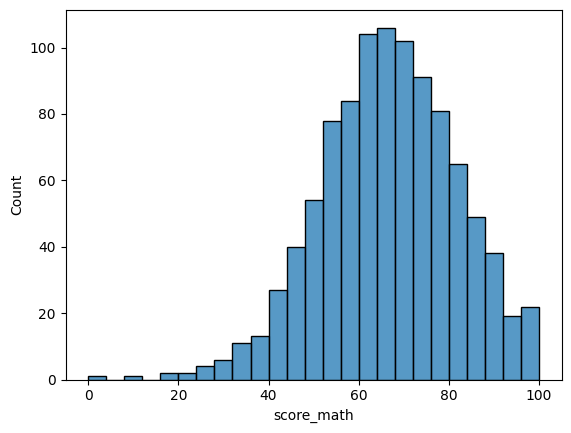

In [6]:
sns.histplot(df.score_math)

<Axes: xlabel='score_reading', ylabel='Count'>

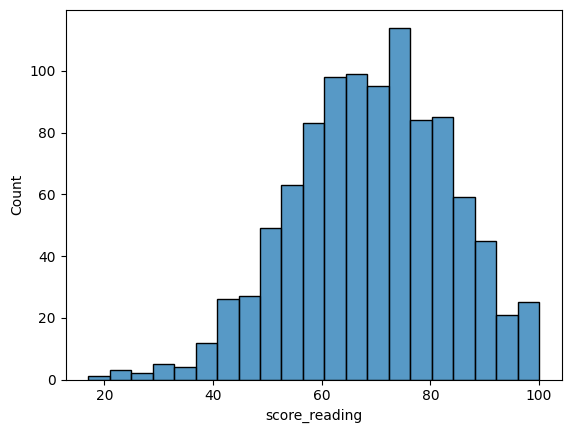

In [8]:
sns.histplot(df.score_reading)

<Axes: xlabel='score_writing', ylabel='Count'>

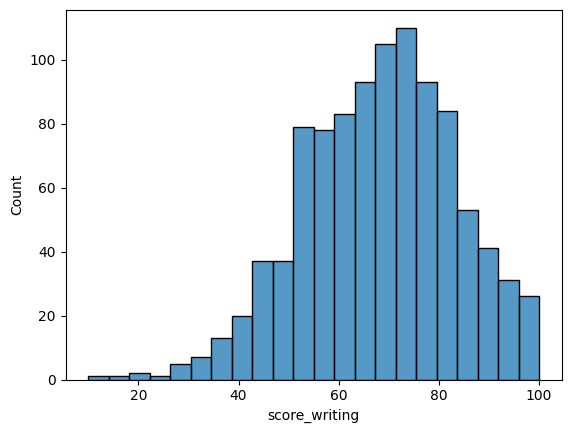

In [9]:
sns.histplot(df.score_writing)

### Removing Outliers

In [10]:
def remove_outliers(feature_name):
    global df
    q3, q1 = np.percentile(df[feature_name], [75, 25])
    iqr = q3-q1
    df = df[ (df[feature_name] >= q1 - (1.5 * iqr)) & (df[feature_name] <= q3 + (1.5 * iqr)) ]

remove_outliers("score_writing")
remove_outliers("score_reading")
remove_outliers("score_math")

### Checking distributions after removing outliers

<Axes: xlabel='score_math', ylabel='Count'>

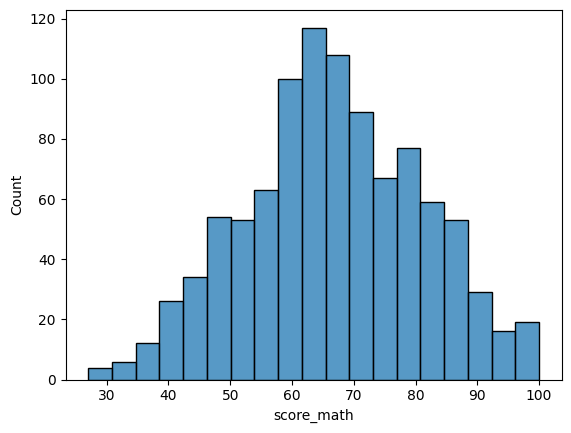

In [11]:
sns.histplot(df.score_math)

<Axes: xlabel='score_reading', ylabel='Count'>

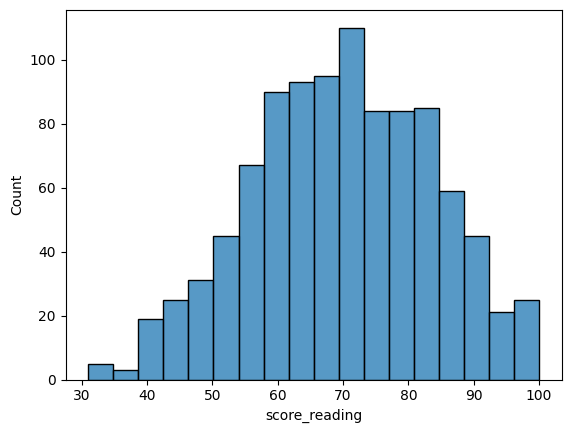

In [12]:
sns.histplot(df.score_reading)

<Axes: xlabel='score_writing', ylabel='Count'>

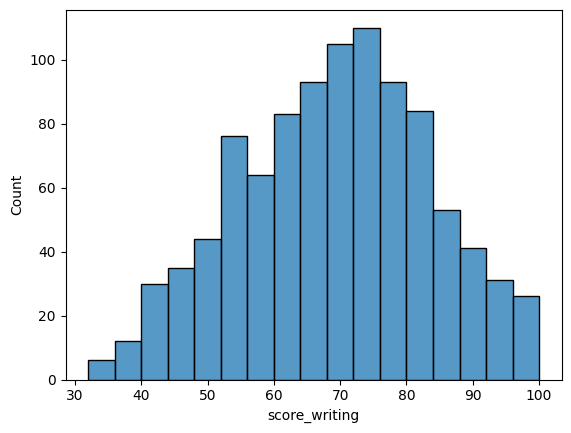

In [13]:
sns.histplot(df.score_writing)

### Label Encoding

In [16]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

df["gender"] = label_encoder.fit_transform(df["gender"])
df["race"] = label_encoder.fit_transform(df["race"])
df["parent_edu"] = label_encoder.fit_transform(df["parent_edu"])
df["lunch"] = label_encoder.fit_transform(df["lunch"])

### Z Score Normalization of Numerical Variables

In [19]:
def normalize_z_score( feature ):
    df[feature] = ( df[feature] - df[feature].mean() ) / df[feature].std()

normalize_z_score("score_writing")
normalize_z_score("score_reading")
normalize_z_score("score_math")

In [20]:
df

,gender,race,parent_edu,lunch,course_completed,score_math,score_reading,score_writing
0,0,1,1,1,none,0.369943,0.163678,0.370964
1,0,2,4,1,completed,0.160750,1.457644,1.341360
2,0,1,3,1,none,1.625105,1.817079,1.687930
3,1,0,0,0,none,-1.373337,-0.914627,-1.708457
4,1,2,4,1,none,0.648868,0.595000,0.440278
...,...,...,...,...,...,...,...,...
995,0,4,3,1,completed,1.485643,2.104627,1.826558
996,1,2,2,0,none,-0.327369,-1.058402,-0.946003
997,0,2,2,0,completed,-0.536563,0.091791,-0.252863
998,0,3,4,1,completed,0.091018,0.595000,0.578906
